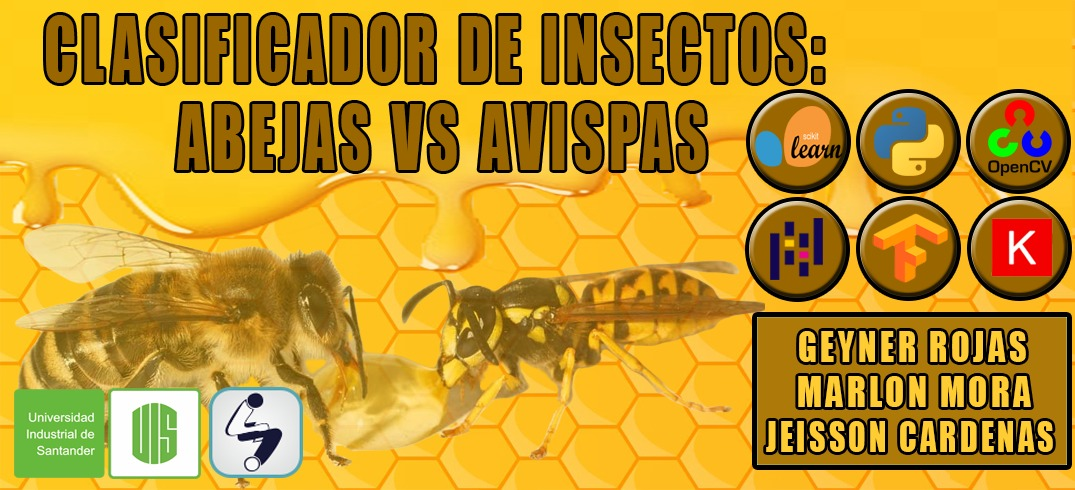

# **CLASIFICADOR DE INSECTOS: ABEJAS VS AVISPAS**

# **Introducción**




Investigadores y autoridades del estado de Washington (noroeste de EE.UU.) se mostraron preocupados ante la llegada de la conocida como ‘avispa asesina’ por primera vez al país, lo que genera inquietud por su peligrosidad e impacto sobre la fauna local.

El avispón asiático gigante es considerado una especie invasora por su potencial colonizador y por constituir una amenaza grave para las colmenas de abejas, porque estas avispas gigantes son capaces de eliminar una colmena de abejas en cuestión de horas gracias a sus potentes mandíbulas.

Cerca de un 25 por ciento de las 20.000 especies de abejas conocidas hasta la fecha han desaparecido de los registros del Centro de Información sobre la Biodiversidad Global (Gbif) desde 1990, según un estudio publicado por los biólogos argentinos Eduardo Zattara y Marcelo Aizen, de la Universidad Nacional del Comahue (UNC).

# **1. Importando Librerias**







In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# **2. Cargando datos**
Cargar el drive y subir el .json (clave) de Kaggle.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"geynerrojas","key":"89d6e28e9c68740aeed5a786f41e7072"}'}

Cargar el .json de Kaggle.

In [ ]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 67 Mar  4 15:47 kaggle.json


Instalar el Kaggle, descargar el dataset y descomprimirlo.

In [ ]:
!pip install -q kaggle
!kaggle datasets download -d jerzydziewierz/bee-vs-wasp
!unzip bee-vs-wasp.zip -d /content
!rm bee-vs-wasp.zipy

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/576622.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/576810.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/576855.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/576993.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577087.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577126.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577128.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577283.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577310.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577643.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577807.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/577847.jpg  
  inflating: /content/kaggle_bee_vs_wasp/other_noinsect/578261.jpg  
  inflating: /content/kaggle_bee_vs_wasp/o

Ubicamos las carpetas deseadas:


*   wasp1
*   bee1
*   wasp2
*   bee2



In [ ]:
base_dir =  r'/content/kaggle_bee_vs_wasp'
folders = os.listdir(base_dir)
print(folders)

['README.md', 'other_insect', 'other_noinsect', 'wasp1', 'bee1', 'bee2', 'labels.csv', 'example_notebook', 'label_generator', 'wasp2']


Guardar las imagenes en variables

In [ ]:
avispa1 = sorted(os.listdir(base_dir +'/wasp1'))
abeja1 =  sorted(os.listdir(base_dir +'/bee1'))
avispa2 = sorted(os.listdir(base_dir +'/wasp2'))
abeja2 =  sorted(os.listdir(base_dir +'/bee2'))
#Cantidad de imágenes que se tienen de cada clase
print("cantidad de imágenes:")
print("avispa1 :",len(avispa1))
print("avispa2 :",len(avispa2))
print("abeja1 :",len(abeja1))
print("abeja2 :",len(abeja2))

cantidad de imágenes:
avispa1 : 2127
avispa2 : 2816
abeja1 : 2469
abeja2 : 714


# **3. Tratamiento de datos 1**


Se crean las listas con los datos (X), y los labels o clases (y) además de hacerle una redimención a todas las imágenes.

In [ ]:

data = [] #X
labels = []#y
#Se realiza el proceso para la primera carpeta (bee1) y agregamos al label un valor de 0
for k in abeja1:
  img = cv2.imread(base_dir +'/bee1/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(0)

#Se realiza el proceso para la segunda carpeta (bee2) y agregamos al label un valor de 0
for l in abeja2:
  img = cv2.imread(base_dir +'/bee2/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(0)

#Se realiza el proceso para la tercera carpeta (wasp1) y agregamos al label un valor de 1
for i in avispa1:
  img = cv2.imread(base_dir +'/wasp1/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(1)

#Se realiza el proceso para la cuarta carpeta (wasp2) y agregamos al label un valor de 1
for j in avispa2:
  img = cv2.imread(base_dir +'/wasp2/'+j) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(1)


Guardamos los archivos en 2 Arrays que conformarán nuestro DataSet



*   Elemento de lista
*   Elemento de lista



In [ ]:
imagenes = np.array(data)
labels = np.array(labels)


Normalizar para que el costo luego de iterar no crezca sin fin.


In [ ]:
imagenes = imagenes.astype(np.float32)
labels = labels.astype(np.int32)
imagenes = imagenes/255

Se permutan los datos para que el dataset quede revuelto.

In [ ]:
p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

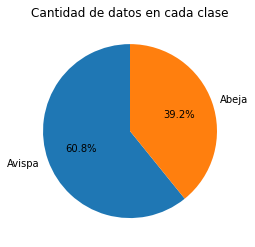

In [ ]:
pie=[]
for i in labels:
  if i == 1:
    pie.append("Avispa")
  else:
    pie.append("Abeja")

label_pie= pd.DataFrame(pie,columns=["a"])
labels2plt = list(label_pie['a'].unique())
y = list(label_pie['a'].value_counts())
plt.pie(y, labels=labels2plt, autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de datos en cada clase')
plt.show()


Dividimos los datos para entrenamiento (70%) y test (30%).

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(imagenes, labels, test_size = 0.3, random_state = 111)

# **4. Implementando Modelos de clasificación**



##Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

estimador = GaussianNB()

estimador.fit(X_tr,y_tr)
predicciones = estimador.predict(X_tr)
score = cross_val_score(estimador, X_tr, y_tr, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.609 (+/- 0.01891)


## DecisionTreeClassifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.627 (+/- 0.01982)


Para este método se probaron dos diferentes valores en el parámetro max_depth, consiguiendo así, un mejor accuracy haciendo uso del valor max_depth=60.

In [ ]:

from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier(max_depth=60)

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.647 (+/- 0.02719)


## RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier

estimador = RandomForestClassifier()

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score1 %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score1 0.701 (+/- 0.02311)


Teniendo en cuenta lo visto en el anterior método, se puede deducir que una buena profundidad para el método Random Forest, sería el valor de 60, subiendo así un poco el accuracy del método RandomForest.


In [ ]:

from sklearn.ensemble import RandomForestClassifier

estimador = RandomForestClassifier(max_depth=60)

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score1 %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score1 0.702 (+/- 0.02550)


## Haciendo uso de SVC

In [ ]:

from sklearn.svm import SVC

estimador = SVC()

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score 0.715 (+/- 0.01813)


Para el estimador SVC se dejó el kernel por defecto el cual es rbf, ya que muestra unos mejore resultados.

# **5. Tratamiento de datos 2**

Nuevamente tratamos las imagenes para el uso de la CNN, y no usaremos escala de grises sino RGB.

In [ ]:
data = [] #X o caracteristicas
labels = [] #y o clases
  #carga la imagenes

for k in abeja1:
  try:
    img = cv2.imread(base_dir +'/bee1/'+k) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    
    data.append(np.array(resized))
    labels.append(0)

  except AttributeError:
    print('')

for l in abeja2:
  try:
    img = cv2.imread(base_dir +'/bee2/'+l) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    
    data.append(np.array(resized))
    labels.append(0)

  except AttributeError:
    print('')

for i in avispa1:
  try:
    img = cv2.imread(base_dir +'/wasp1/'+i) 
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    data.append(np.array(resized))
    labels.append(1)

  except AttributeError:
    print('')

for j in avispa2:
  try:
    img = cv2.imread(base_dir +'/wasp2/'+j) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(128,128))
    
    data.append(np.array(resized))
    labels.append(1)

  except AttributeError:
    print('')

In [ ]:
imagenes = np.array(data)
labels = np.array(labels)

In [ ]:
print('imagenes : {} | labels : {}'.format(imagenes.shape , labels.shape))

imagenes : (8126, 128, 128, 3) | labels : (8126,)


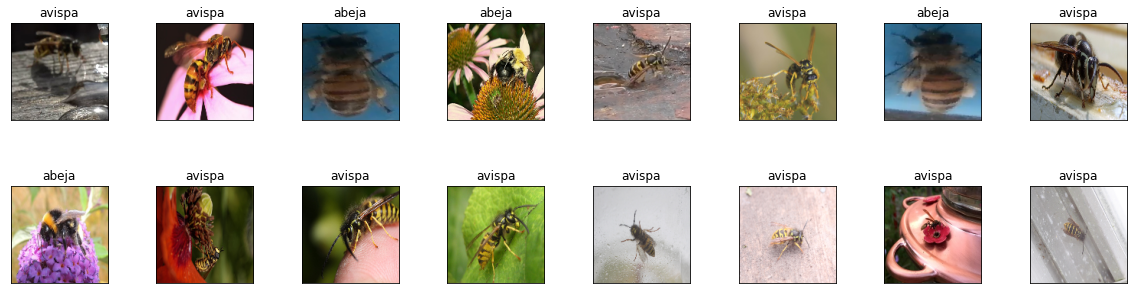

In [ ]:
plt.figure(1, figsize=(20,5))
n=0
for i in range(16):
  n += 1
  r = np.random.randint(0, imagenes.shape[0], 1)
  plt.subplot(2, 8, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.5, wspace =0.5)
  plt.imshow(imagenes[r[0]])
  plt.title('{}'.format('avispa' if labels[r[0]] == 1 else 'abeja', labels[r[0]]))
  plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

Dividimos los datos para entrenamiento (80%) y test (20%)

In [ ]:
from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(imagenes, labels, test_size = 0.2, random_state = 111)

In [ ]:
X_train = X_train.reshape([-1, 128, 128, 3])
X_test = X_test.reshape([-1, 128, 128, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Numero de imagenes en x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Numero de imagenes in x_test', X_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (6500, 128, 128, 3)
Numero de imagenes en x_train 6500 y_train: (6500, 2)
Numero de imagenes in x_test 1626 y_test:  (1626, 2)


# **6. Clasificación con CNN**

In [ ]:
 model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0

Compilamos el estimador.

In [ ]:
 model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
print('Compiled!')

Compiled!


Realizamos el entrenamiento asegurandonos de no llegar a un overfitting .

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.987 ):
            print("\nReached 98.7% accuracy so cancelling training!")
            self.model.stop_training = True 

In [ ]:
callbacks=myCallback()
history = model.fit(X_train,y_train, batch_size = 64, epochs=20,  validation_split = 0.2,
                    callbacks = callbacks,
                    verbose=1, shuffle=True)


Epoch 1/20
82/82 [==============================] - 33s 30ms/step - loss: 1.2846 - accuracy: 0.5756 - val_loss: 0.9045 - val_accuracy: 0.4000
Epoch 2/20
82/82 [==============================] - 2s 24ms/step - loss: 0.6334 - accuracy: 0.6561 - val_loss: 0.5033 - val_accuracy: 0.7669
Epoch 3/20
82/82 [==============================] - 2s 24ms/step - loss: 0.4900 - accuracy: 0.7840 - val_loss: 0.4577 - val_accuracy: 0.8200
Epoch 4/20
82/82 [==============================] - 2s 24ms/step - loss: 0.4267 - accuracy: 0.8149 - val_loss: 0.5024 - val_accuracy: 0.7685
Epoch 5/20
82/82 [==============================] - 2s 25ms/step - loss: 0.4527 - accuracy: 0.7934 - val_loss: 0.3473 - val_accuracy: 0.8538
Epoch 6/20
82/82 [==============================] - 2s 24ms/step - loss: 0.3797 - accuracy: 0.8346 - val_loss: 0.4179 - val_accuracy: 0.8246
Epoch 7/20
82/82 [==============================] - 2s 24ms/step - loss: 0.3741 - accuracy: 0.8326 - val_loss: 0.3235 - val_accuracy: 0.8654
Epoch 8/20
8

Y realizamos el test.

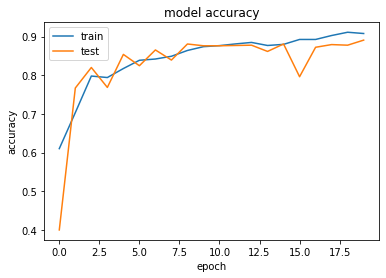

In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
 plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_train, y_train)
loss, acc

204/204 [==============================] - 1s 6ms/step - loss: 0.1910 - accuracy: 0.9337


(0.1909746676683426, 0.9336923360824585)

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
loss, acc

51/51 [==============================] - 0s 7ms/step - loss: 0.3447 - accuracy: 0.8825


(0.3447442352771759, 0.882533848285675)

# **7. Conclusiones**

 

1.   Con los métodos de clasificación convencionales (GNB, DTC, RFC, SVC) se consiguió un accuracy bastante similar, aunque el RFC con un parámetro de max_depth=60 consiguió un valor bastante apróximado al SVC, el cual es el mejor valor que se obtuvo, siendo este de un 71.5% apróximadamente.

2.   Para los métodos convencionales es necesario pasar las imagenes a escala de grises y hacer un colapso en el array de la imagen, con la función flatten  bajando así su dimensionalidad.

3.   Al implementar la red neuronal convolucional utilizando un batch de 64 y con 20 epoch, se logró obtener un puntaje del 93.37% para los datos de entrenamiento y un puntaje de 88.25% para los datos de test, mostrando una diferencia significativa con los anteriores modelos, siendo este el mejor accuracy obtenido.

4.   Como propuesta a mejorar de nuestro clasificador de insectos, es añadir una siguiente variedad de insecto, aumentando así el número de clases.



